<a href="https://colab.research.google.com/github/Clarke-Henshaw-Miles/extra/blob/master/DATA%20SCIENCE/Chapter6Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To be completed at the Live Session and in your own time.

These set of examples we will help you get familiar with non parametric tests and correlations within a Jupyter notebook.   The questions coloured green are important practice for CA, particularly CA 2.

Before attempting these examples, please ensure you have read through [Chapter 6 Jupyter Notebook](https://github.com/haleygomez/Data-Science-2024/blob/main/blended_exercises/Chapter6/Chapter6.ipynb) and have completed the Learning Central **Chapter 6 quiz**.

***

#  Credible Intervals

## <font color=#30a64d>Question</font>

Professor Dumbledore, studying the extinction of dragons, discovers a new set of egg remnants in an unexplored valley in Madagascar. The remnants are radio carbon dated and found to have the following ages in years:

2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59

Professor Snape however did a previous study in the next valley where he found eggs that were on average 1200 years old, following a normal distribution with standard deviation of 300 years.

1. What is the mean and standard deviation of the age of elephant bird eggs based on Dumbledore's data?

2. Write down an analytical expression for the mean of the ages that takes into account both Professor Dumbledore's new data and the previous age estimate from Professor Snape. Estimate the variance in your mean value.

3. Plot and discuss your results including a discussion of your methods.

### Answer

### PART 1

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

#creating array for dumbledore's data
age_yrs = [2141.22, 1781.15, 1523.37, 1816.90, 1932.29, 1541.21, 720.782, 1026.22, 1687.22, 2460.59]
n = len(age_yrs)
print("There are {} data points".format(n))

#calculating mean and standard deviation
mean_dumble = np.mean(age_yrs)
std_dumble = np.std(age_yrs)
var_dumble = std_dumble**2
print("The mean for Dumbledore's data is {:.2f}".format(mean_dumble))
print("The standard deviation for Dumbledore's data is {:.2f}".format(std_dumble))
print("The variance for Dumbledore's data is {:.2f}".format(var_dumble))

There are 10 data points
The mean for Dumbledore's data is 1663.10
The standard deviation for Dumbledore's data is 479.92
The variance for Dumbledore's data is 230318.53


### PART 2

The analytical expression for the mean of the ages for normal likelihood and normal prior:

$\hat{\theta}=\dfrac{\sigma_0^2}{\sigma_0^2+\sigma^2/n}\hat{X}+ \dfrac{\sigma^2/n}{\sigma_0^2+\sigma^2/n}\mu_0$

where:
- $\sigma_0$ = prior standard dev
- $\mu_0$ = prior mean
- $\hat{X}$ = mean of the sample

depends on *both the mean and variance of the data*, $\hat{X}~~\text{and}~~\sigma^2$, and *the mean and variance of the prior*, $\mu_0~~\text{and}~~\sigma_0^2.$

Snape's experiment = prior


In [21]:
#snape's findings
mean_snape = 1200
std_snape = 300
var_snape = std_snape**2
dist = norm(loc=mean_snape, scale=std_snape)

# function for mean of posterior if posterior normal
def post_mean(var_0,var,n,X,mu_0):
    result = (var_0/ (var_0 + (var/n)) ) * X + ((var/n)/(var_0+(var/n)))*mu_0
    return result

# function for width (standard dev) of posterior if posterior normal
def post_std(var_0,var,n):
    result = np.sqrt((var_0*(var/n)) / (var_0 + (var/n)))
    return result

# set up an array
d = np.linspace(600,2600,100)

posterior_mean = post_mean(var_snape,var_dumble,n,mean_dumble,mean_snape)
posterior_std = post_std(var_snape,var_dumble,n)
print("The posterior mean is {:.2f}".format(posterior_mean))
print("The posterior standard deviation is {:.2f}".format(posterior_std))


The posterior mean is 1568.73
The posterior standard deviation is 135.42


### PART 3

Text(0, 0.5, 'PDF')

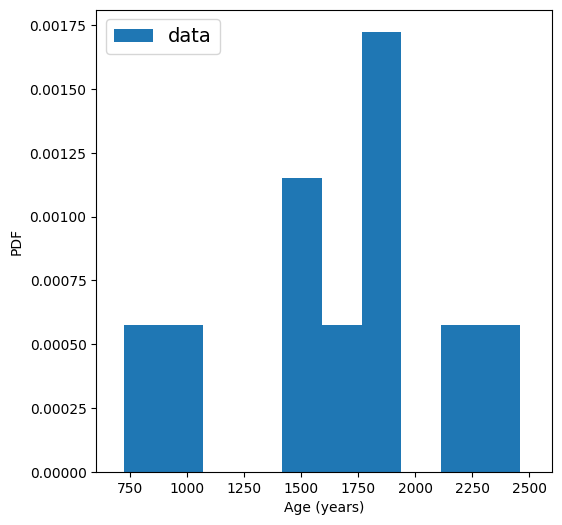

In [22]:
plt.figure(figsize=(20,6))
# for plotting

#histogram of data
plt.subplot(131)
plt.hist(age_yrs,density=True,label='data')
plt.legend(loc='upper left',fontsize=14)
plt.xlim(600,2600)
plt.xlabel('Age (years)')
plt.ylabel('PDF')


***